# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Kaiyan Jiang
*   **Student number**: 1003848189



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [185]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

In [186]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**


---
### 1


In [187]:
import matplotlib.pyplot as plt
import numpy as np

In [188]:
def CountryTimeSeries (df, country_list):
  n = len(df)
  m = len(country_list)

  fig, axs = plt.subplots(m,1,figsize = (12,9))
  fig.tight_layout(pad=3.0)

  time = df.columns.tolist()
  ticks = ['2020-01-22','2020-05-03','2020-08-13','2020-11-23',
         '2021-03-05','2021-06-15']

  for i in range(0,m):
    title = country[i]
    axs[i].plot(time, df.loc[country[i]].values)
    axs[i].set_title(title,size=15)

  for ax in axs.flat:
    ax.set(xlabel='Time', ylabel='Number of Cases')
    ax.set_xticks(ticks)

### 2

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
cases_std = StandardScaler().fit_transform(cases_raw)
cases_std = pd.DataFrame(cases_std,columns = cases_raw.columns.values,index=cases_raw.index.values)

In [191]:
cases_raw.iloc[:,1].mean(),cases_std.iloc[:,1].mean()

(3.393782383419689, -1.980281223975182e-16)

In [192]:
cases_raw.iloc[:,1].var(),cases_std.iloc[:,1].var()

(2141.9482944732345, 1.0052083333333346)

### 3

In [193]:
country = ['Canada','US','China']

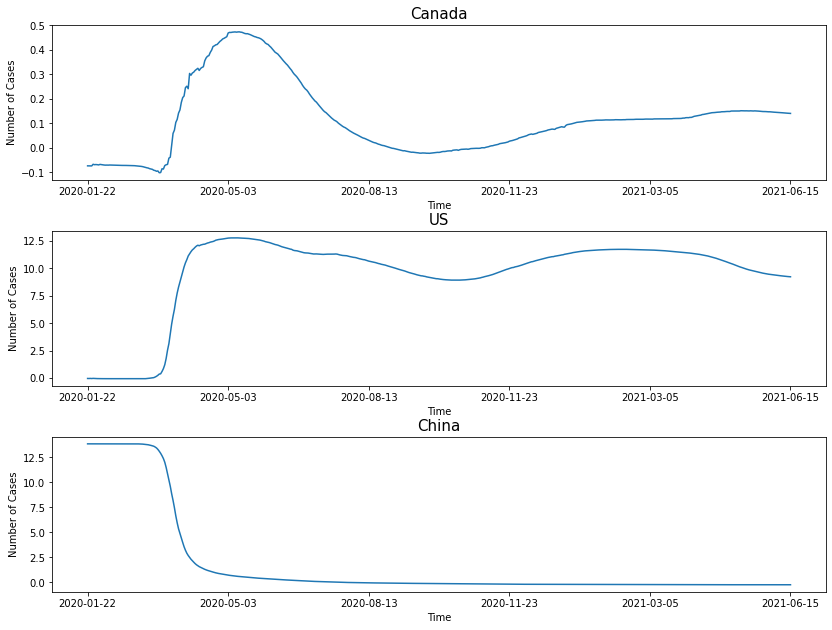

In [194]:
CountryTimeSeries(cases_std,country)

### 4

From the plot, we can see that at the beginning of 2020, China has more confirmed cases than the other two countries. The number of confirmed cases starts to drop dramatically around April 2020, and since then, the number of cases has decreased to the average number of cases of the whole world.  

Around March 2020, the number of confirmed cases in the US increases rapidly to a much higher level than the world average. Before that, the confirmed cases stabilize around the world average number in late January and February.  In October 2020, there is a slight decrease in the number of cases for the US, but it rises again soonly. Also, the decrease happens again in late May and June in 2021.  

The trend of Canada is similar to the trend of the US. It starts with a level below the world average in late January 2020 and increases steeply in March 2020. In mid-May, the confirmed cases reach the peak. But after July, the number of confirmed cases goes back to the world average level. However, the number of cases increases slowly after September 2020, with a slightly higher level than the world average.  

When the curve goes up, that means the number of confirmed cases increases. Similarly, so when the curve goes down, the number of cases decreases.  

After we standardized the dataset, 0 means the average level of cases number of all countries. So a positive value represents that how much the number of confirmed cases of the country is above the world average, and a negative value means how much the number is below the world average.  

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

###1

In [195]:
n,m = cases_std.shape
cases_cov = np.dot(cases_std.T, cases_std) / (n-1) 
cases_cov = pd.DataFrame(cases_cov)

### 2

In [196]:
def get_sorted_eigen (df_cov):

  Eigenvalues, Eigenvectors = np.linalg.eigh(df_cov)

  args = (-Eigenvalues).argsort()
  Eigenvalues = Eigenvalues[args]
  Eigenvectors = Eigenvectors[:, args]

  return Eigenvalues, Eigenvectors

In [197]:
Eigenvalues, Eigenvectors = get_sorted_eigen(cases_cov)

In [198]:
print ("Eigenvectors:\n ",Eigenvectors, " \n Eigenvalues: \n", Eigenvalues)

Eigenvectors:
  [[-0.00068142  0.12313007  0.03865575 ...  0.          0.
   0.        ]
 [-0.0006685   0.12312809  0.03867506 ... -0.0072161  -0.01914882
  -0.00337959]
 [-0.00070159  0.12314123  0.03858246 ... -0.00256999  0.01102435
   0.03814935]
 ...
 [-0.04721997 -0.00766504  0.04392301 ...  0.01055351  0.03266906
   0.00114774]
 [-0.04721007 -0.00768119  0.04408039 ... -0.00573702 -0.00311817
  -0.00522846]
 [-0.0471996  -0.00770528  0.04430212 ...  0.01102318  0.00717457
   0.03137014]]  
 Eigenvalues: 
 [ 4.15859955e+02  6.30755884e+01  2.42804734e+01  6.58766327e+00
  2.35113367e+00  6.36970336e-01  3.78816726e-01  1.70990126e-01
  1.52302455e-01  5.96991106e-02  3.97812289e-02  2.47480457e-02
  1.23106633e-02  8.05302746e-03  6.43469113e-03  4.42305701e-03
  3.22805403e-03  2.48014124e-03  1.29916577e-03  1.12691477e-03
  8.68878101e-04  5.16714710e-04  4.63995472e-04  4.31200908e-04
  3.46373398e-04  2.18925832e-04  1.72836187e-04  1.15520071e-04
  1.06198369e-04  9.0763558

###3

In [199]:
EigvalSum = sum(Eigenvalues)
Expvar = [eigV/EigvalSum*100 for eigV in Eigenvalues]
cumExpvar = np.cumsum(Expvar)[0:20]

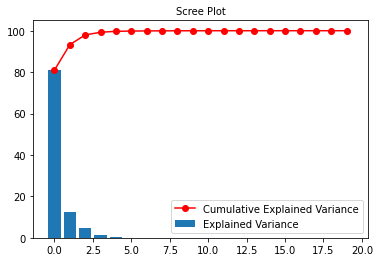

In [200]:
plt.bar(range(20), Expvar[:20], label='Explained Variance')
plt.plot(cumExpvar, 'r-o', label='Cumulative Explained Variance')
plt.title('Scree Plot', size=10)
plt.legend()
plt.show()

###4

In [201]:
print(cumExpvar)

[80.95992954 93.23953264 97.96647351 99.24896476 99.70668524 99.8306911
 99.90443943 99.93772792 99.96737827 99.97900054 99.98674518 99.99156315
 99.9939598  99.99552757 99.99678028 99.99764136 99.9982698  99.99875264
 99.99900556 99.99922495]


From the cumulative explained variance, 4 PCs are needed to cover 99% of the dataset's variance.

###5

In [202]:
time = cases_raw.columns.tolist()
ticks = ['2020-01-22','2020-05-03','2020-08-13','2020-11-23',
         '2021-03-05','2021-06-15']

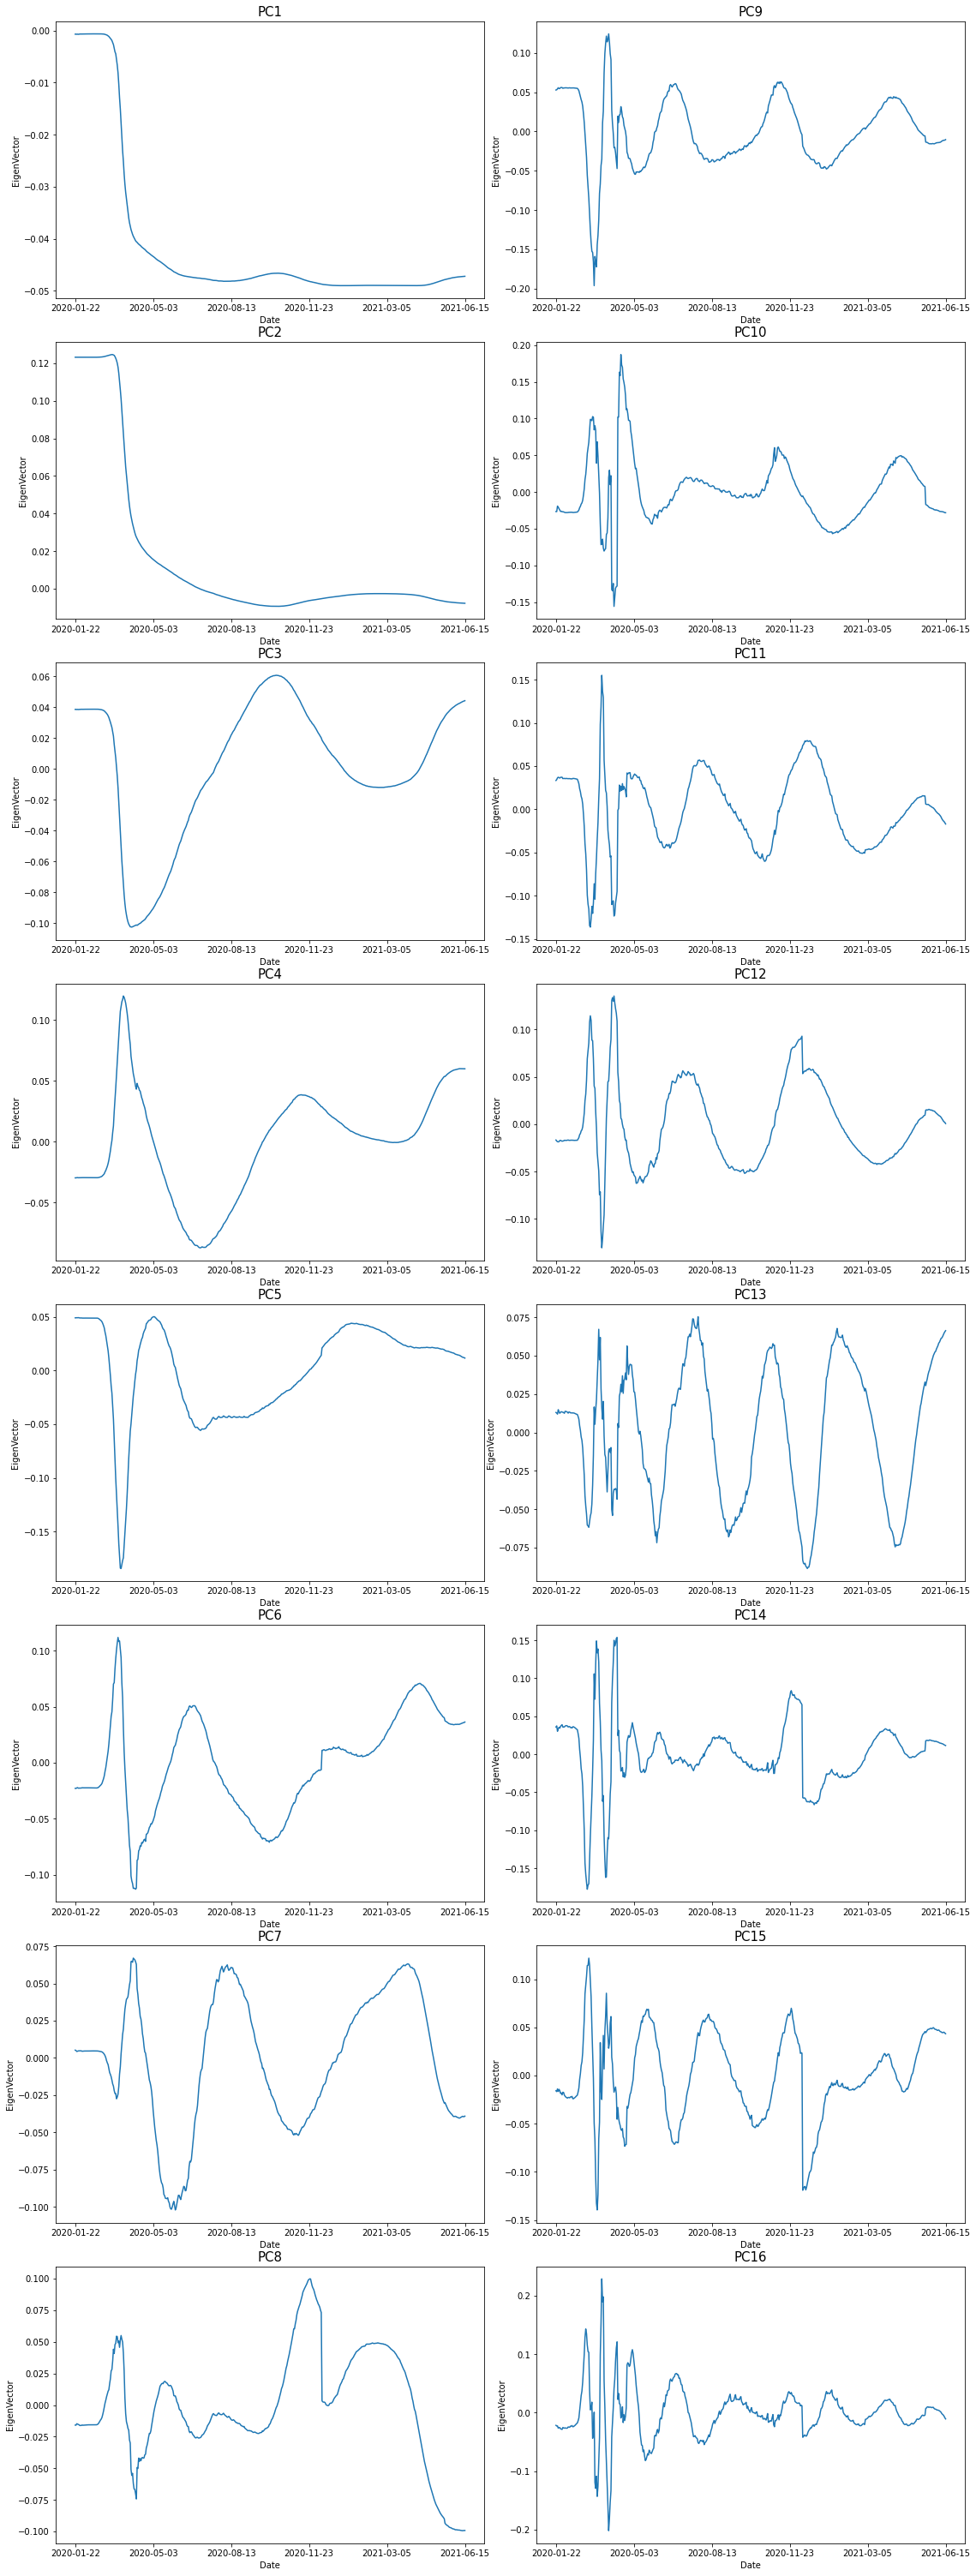

In [203]:
fig, axs = plt.subplots(8,2,figsize = (16,42))
fig.tight_layout(pad=3.0)

for i in range(0,16):
  a = i%8
  b = int(i/8)

  axs[a,b].plot(time,Eigenvectors[:,i])
  axs[a,b].set_title('PC' + str(i+1) ,size = 15) 

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='EigenVector')
    ax.set_xticks(ticks)

###6

The first 4 PCs can already cover 99% variance of the data; the rest of the PCs only slightly increase the variance.  

Hence, for the first 4 PC curves, there is a difference in their shape. But for the rest of the PC curves after PC4, the difference will only be increases of fluctuations, but the general shapes are similar.  

# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [204]:
import math

In [207]:
def plot_country_figures(original_df, country_name):
  scaler = StandardScaler()
  df_std = scaler.fit_transform(original_df)
  df_std = pd.DataFrame(df_std,
                        columns=original_df.columns.values,index=original_df.index.values)

  n,m = df_std.shape
  df_cov = np.dot(df_std.T, df_std) / (n-1) 
  df_cov = pd.DataFrame(df_cov)

  eigenvalues, eigenvectors = get_sorted_eigen(df_cov)

  time = original_df.columns.tolist()
  ticks = ['2020-01-22','2020-05-03','2020-08-13','2020-11-23',
         '2021-03-05','2021-06-15']

  W = eigenvectors[:, 0:1]
  projX = np.dot(df_std, W)
  ReconX = np.dot(projX, W.T)
  X_scale = pd.DataFrame(scaler.inverse_transform(ReconX),
                         columns=original_df.columns.values,index=original_df.index.values)
  
  W_1 = eigenvectors[:, 0:2]
  projX_1 = np.dot(df_std, W_1)
  ReconX_1 = np.dot(projX_1, W_1.T)
  X_scale_1 = pd.DataFrame(scaler.inverse_transform(ReconX_1),
                           columns=original_df.columns.values,index=original_df.index.values)

  W_2 = eigenvectors[:, 0:4]
  projX_2 = np.dot(df_std, W_2)
  ReconX_2 = np.dot(projX_2, W_2.T)
  X_scale_2 = pd.DataFrame(scaler.inverse_transform(ReconX_2),
                           columns=original_df.columns.values,index=original_df.index.values)
  
  W_3 = eigenvectors[:, 0:8]
  projX_3 = np.dot(df_std, W_3)
  ReconX_3 = np.dot(projX_3, W_3.T)
  X_scale_3 = pd.DataFrame(scaler.inverse_transform(ReconX_3),
                           columns=original_df.columns.values,index=original_df.index.values)

  W_4 = eigenvectors[:, 0:16]
  projX_4 = np.dot(df_std, W_4)
  ReconX_4 = np.dot(projX_4, W_4.T)
  X_scale_4 = pd.DataFrame(scaler.inverse_transform(ReconX_4),
                           columns=original_df.columns.values,index=original_df.index.values)

  fig, axs =  plt.subplots(2,2,figsize=(16,12))
  fig.tight_layout(pad=3.0)
  
  # Plot 1
  axs[0,0].plot(time,original_df.loc[country_name].values)
  axs[0,0].set_title('Original Time Series for ' + str(country_name), size=15)
  axs[0,0].set_xlabel('Date')
  axs[0,0].set_ylabel('Number of Cases')
  axs[0,0].set_xticks(ticks)

  # Plot 2
  axs[0,1].plot(time,X_scale.loc[country_name].values,label='Reconstruction with PC1')
  axs[0,1].plot(time,X_scale_1.loc[country_name].values,label='Reconstruction with PC1&PC2')
  axs[0,1].plot(time,X_scale_2.loc[country_name].values,label='Reconstruction with PC1-PC4')
  axs[0,1].plot(time,X_scale_3.loc[country_name].values,label='Reconstruction with PC1-PC8')
  axs[0,1].plot(time,X_scale_4.loc[country_name].values,label='Reconstruction with PC1-PC16')
  axs[0,1].legend()
  axs[0,1].set_title('Incremental Reconstruction for ' + str(country_name),size=15)
  axs[0,1].set_xlabel('Date')
  axs[0,1].set_ylabel('Reconstructed Number of Cases')
  axs[0,1].set_xticks(ticks)

  # Plot 3
  Label = ['Reconstruction with PC1','Reconstruction with PC1&PC2',
           'Reconstruction with PC1-PC4','Reconstruction with PC1-PC8',
           'Reconstruction with PC1-PC16']
  residual_error = [original_df.loc[country_name].values-X_scale.loc[country_name].values,
                    original_df.loc[country_name].values-X_scale_1.loc[country_name].values,
                    original_df.loc[country_name].values-X_scale_2.loc[country_name].values,
                    original_df.loc[country_name].values-X_scale_3.loc[country_name].values,
                    original_df.loc[country_name].values-X_scale_4.loc[country_name].values]
  sum_sqerror = [sum((original_df.loc[country_name].values-X_scale.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-X_scale_1.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-X_scale_2.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-X_scale_3.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-X_scale_4.loc[country_name].values)**2)]
  axs[1,0].plot(time,residual_error[np.array(sum_sqerror).argmin()])
  axs[1,0].set_title('Residual Error of Best Reconstruction for ' + str(country_name) 
  + ' At: ' + str(Label[np.array(sum_sqerror).argmin()]),size=15)
  axs[1,0].set_xlabel('Date')
  axs[1,0].set_ylabel('Residual Error')
  axs[1,0].set_xticks(ticks)

  # Plot 4
  RMSE = []
  for i in range(1,11):
    W = eigenvectors[:,0:i]
    projX = np.dot(df_std,W)
    ReconX = np.dot(projX,W.T)
    X_scale = pd.DataFrame(scaler.inverse_transform(ReconX),index=original_df.index.values)
    n = X_scale.loc[country_name].size
    SE = sum((original_df.loc[country_name].values-X_scale.loc[country_name].values)**2)/n
    RMSE.append(math.sqrt(SE))
  x = list(range(1,11))
  axs[1,1].plot(x,RMSE)
  axs[1,1].set_title('RMSE with Number of Components for ' + str(country_name),size=15)
  axs[1,1].set_xlabel('Number of Components')
  axs[1,1].set_ylabel('RMSE')

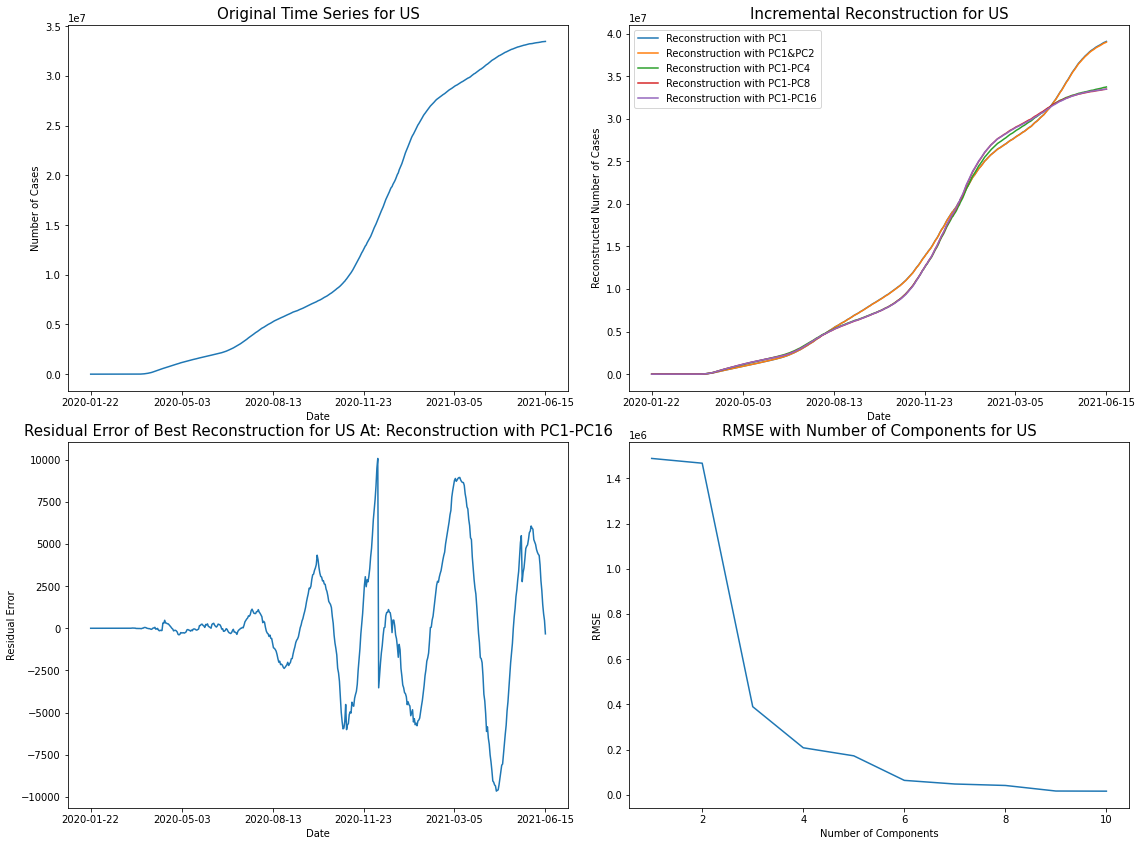

In [208]:
plot_country_figures(cases_raw,'US')

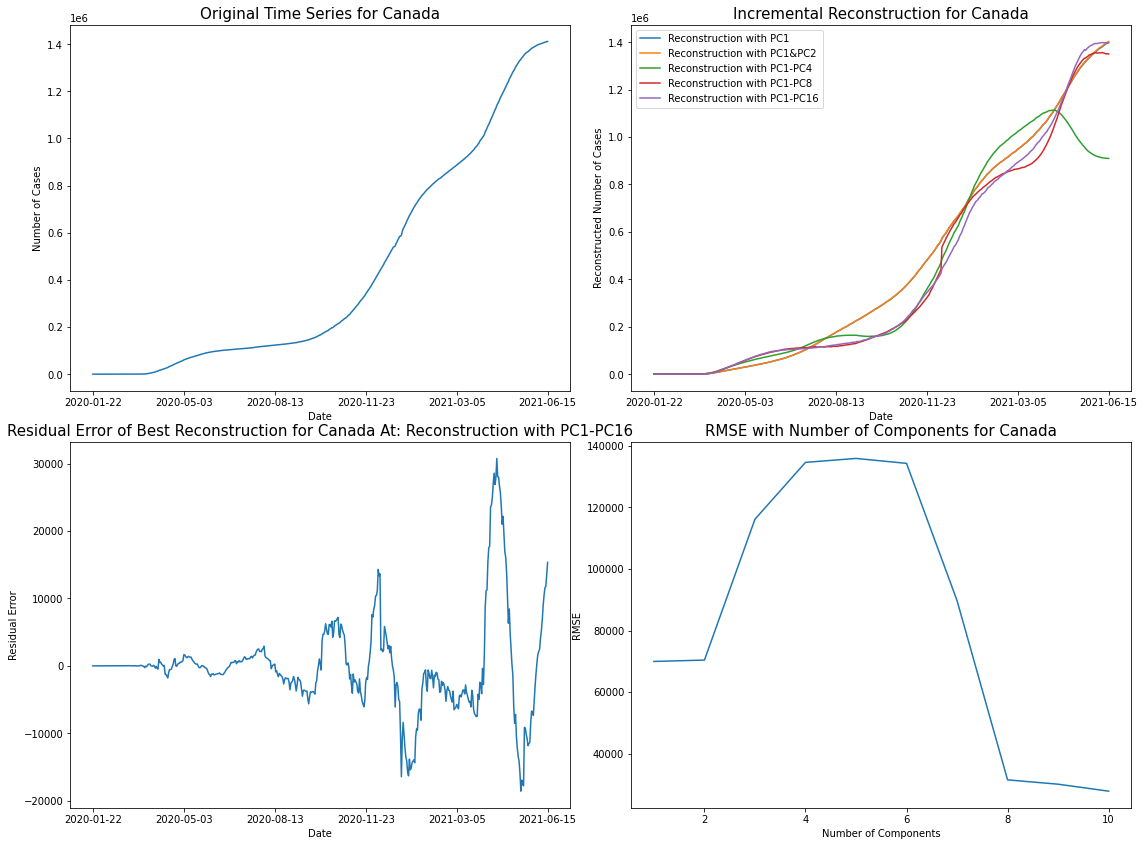

In [209]:
plot_country_figures(cases_raw,'Canada')

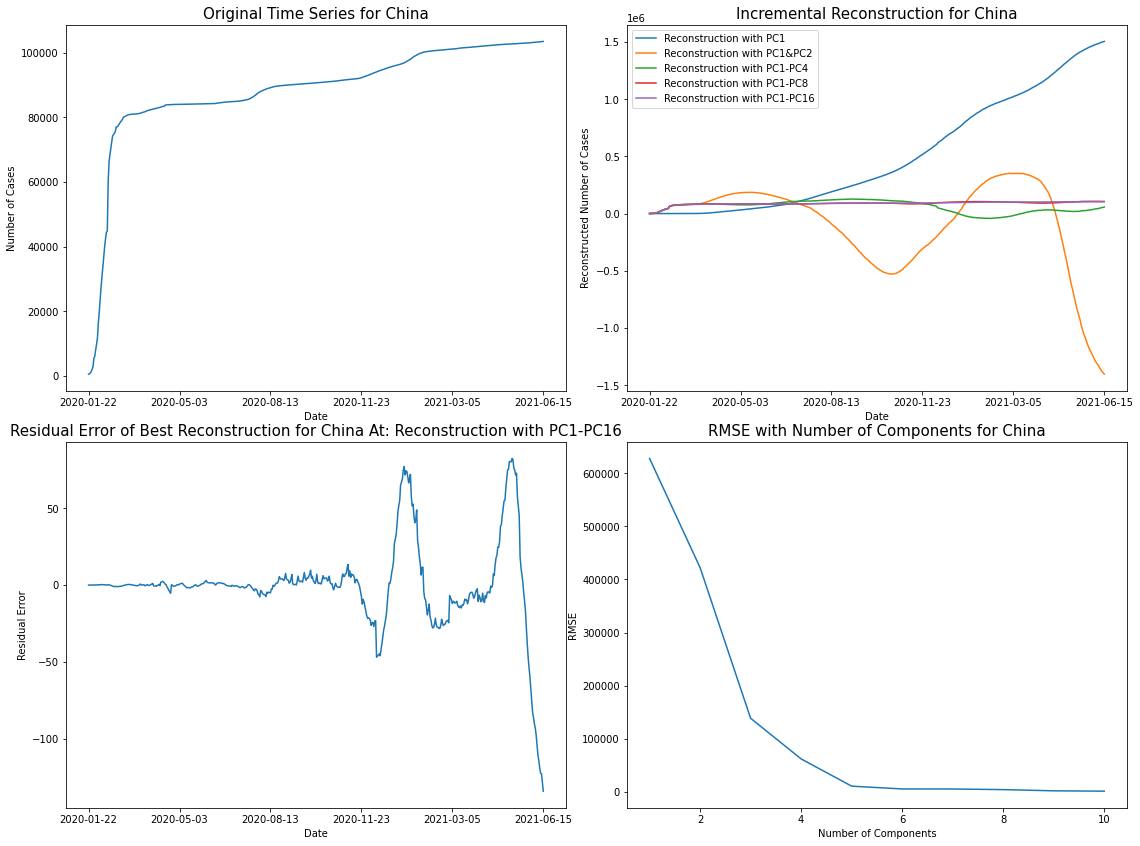

In [210]:
plot_country_figures(cases_raw,'China')

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [211]:
def plot_country_figures_SVD (original_df, country_name):
  scaler = StandardScaler()
  df_std = scaler.fit_transform(original_df)
  df_std = pd.DataFrame(df_std,columns=original_df.columns.values,index=original_df.index.values)

  U, S, V = np.linalg.svd(df_std)

  time = original_df.columns.tolist()
  ticks = ['2020-01-22','2020-05-03','2020-08-13','2020-11-23',
         '2021-03-05','2021-06-15']

  u = U[:,0:1]
  v = V[0:1,:]
  A = pd.DataFrame(scaler.inverse_transform(S[0:1]*u@v),
                   columns=original_df.columns.values,index=original_df.index.values)

  u1 = U[:,0:2]
  v1 = V[0:2,:]
  A1 = pd.DataFrame(scaler.inverse_transform(S[0:2]*u1@v1),
                    columns=original_df.columns.values,index=original_df.index.values)

  u2 = U[:,0:4]
  v2 = V[0:4,:]
  A2 = pd.DataFrame(scaler.inverse_transform(S[0:4]*u2@v2),
                    columns=original_df.columns.values,index=original_df.index.values)

  u3 = U[:,0:8]
  v3 = V[0:8,:]
  A3 = pd.DataFrame(scaler.inverse_transform(S[0:8]*u3@v3),
                    columns=original_df.columns.values,index=original_df.index.values)

  u4 = U[:,0:16]
  v4 = V[0:16,:]
  A4 = pd.DataFrame(scaler.inverse_transform(S[0:16]*u4@v4),
                    columns=original_df.columns.values,index=original_df.index.values)

  fig, axs =  plt.subplots(2,2,figsize=(16,12))
  fig.tight_layout(pad=3.0)
  
  # Plot 1
  axs[0,0].plot(time,original_df.loc[country_name].values)
  axs[0,0].set_title('Original Time Series for ' + str(country_name), size=15)
  axs[0,0].set_xlabel('Date')
  axs[0,0].set_ylabel('Number of Cases')
  axs[0,0].set_xticks(ticks)

  # Plot 2
  axs[0,1].plot(time,A.loc[country_name].values,label='Reconstruction with Sigular Value 1')
  axs[0,1].plot(time,A1.loc[country_name].values,label='Reconstruction with Sigular Value 1&2')
  axs[0,1].plot(time,A2.loc[country_name].values,label='Reconstruction with Sigular Value 1-4')
  axs[0,1].plot(time,A3.loc[country_name].values,label='Reconstruction with Sigular Value 1-8')
  axs[0,1].plot(time,A4.loc[country_name].values,label='Reconstruction with Sigular Value 1-16')
  axs[0,1].legend()
  axs[0,1].set_title('Incremental Reconstruction for ' + str(country_name),size=15)
  axs[0,1].set_xlabel('Date')
  axs[0,1].set_ylabel('Reconstructed Number of Cases')
  axs[0,1].set_xticks(ticks)

  # Plot 3
  Label = ['Reconstruction with Sigular Value 1','Sigular Value 1&2',
           'Reconstruction with Sigular Value 1-4','Reconstruction with Sigular Value 1-8',
           'Reconstruction with Sigular Value 1-16']
  residual_error = [original_df.loc[country_name].values-A.loc[country_name].values,
                    original_df.loc[country_name].values-A1.loc[country_name].values,
                    original_df.loc[country_name].values-A2.loc[country_name].values,
                    original_df.loc[country_name].values-A3.loc[country_name].values,
                    original_df.loc[country_name].values-A4.loc[country_name].values]
  sum_sqerror = [sum((original_df.loc[country_name].values-A.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-A1.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-A2.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-A3.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-A4.loc[country_name].values)**2)]
  axs[1,0].plot(time,residual_error[np.array(sum_sqerror).argmin()])
  axs[1,0].set_title('Residual Error for ' + str(country_name) 
  + ' At: ' + str(Label[np.array(sum_sqerror).argmin()]),size=15)
  axs[1,0].set_xlabel('Date')
  axs[1,0].set_ylabel('Residual Error')
  axs[1,0].set_xticks(ticks)

  # Plot 4
  RMSE = []
  for i in range(1,11):
    u = U[:,0:i]
    v = V[0:i,:]
    A = pd.DataFrame(scaler.inverse_transform(S[0:i]*u@v),index=original_df.index.values)
    n = A.loc[country_name].size
    SE = sum((original_df.loc[country_name].values-A.loc[country_name].values)**2)/n
    RMSE.append(math.sqrt(SE))
  x = list(range(1,11))
  axs[1,1].plot(x,RMSE)
  axs[1,1].set_title('RMSE with Number of Sigular Value for ' + str(country_name),size=15)
  axs[1,1].set_xlabel('Number of Sigular Values')
  axs[1,1].set_ylabel('RMSE')

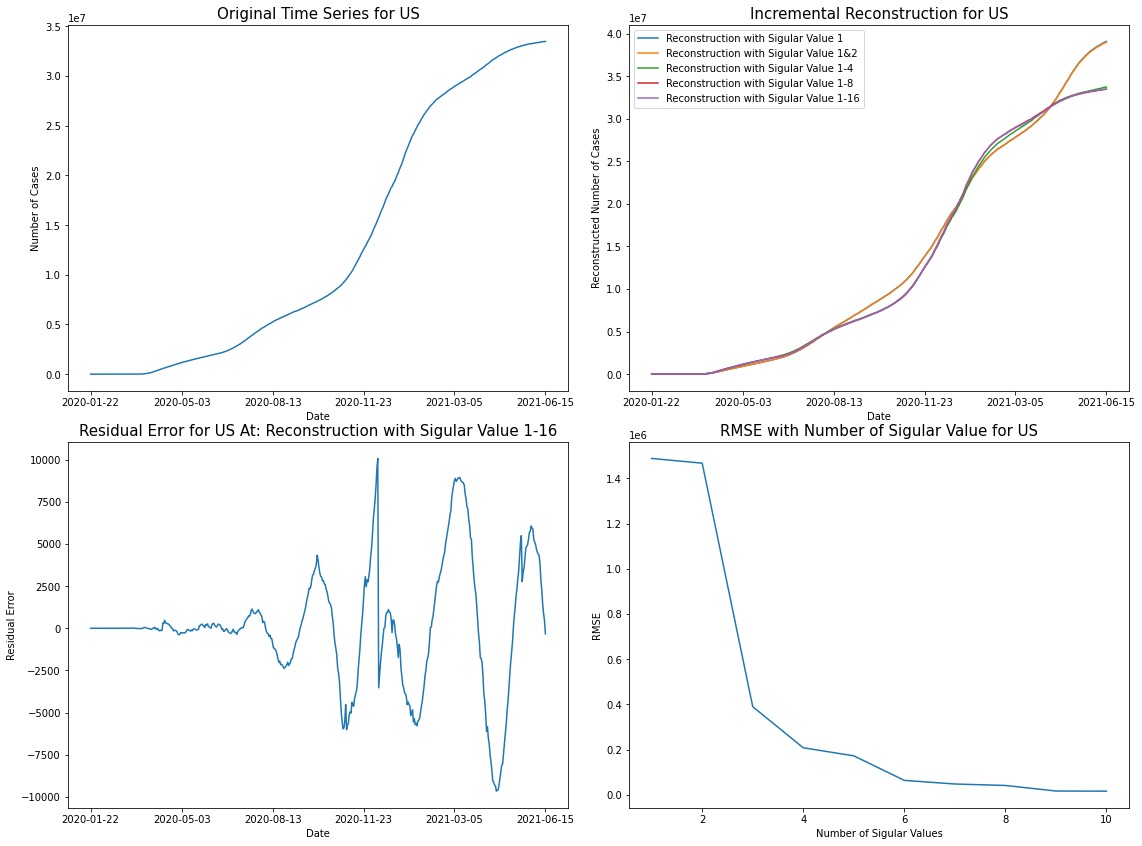

In [212]:
plot_country_figures_SVD(cases_raw,'US')

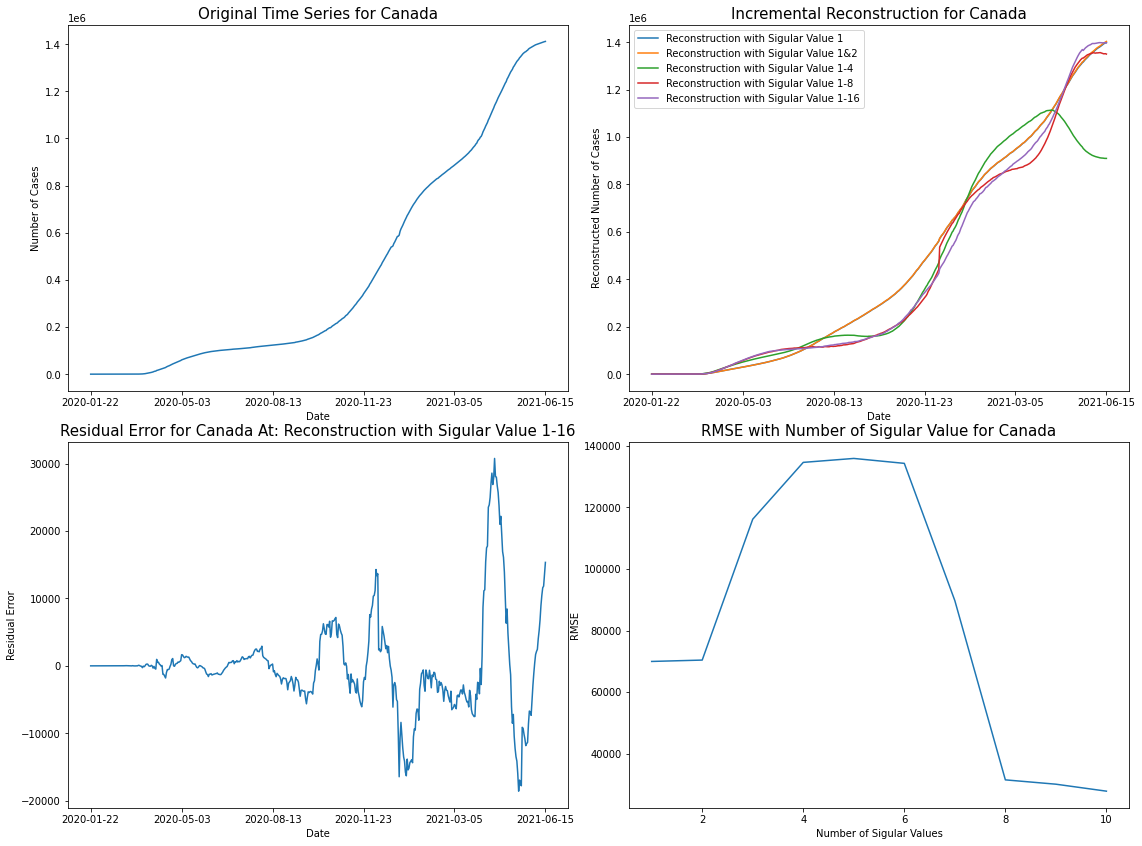

In [213]:
plot_country_figures_SVD(cases_raw,'Canada')

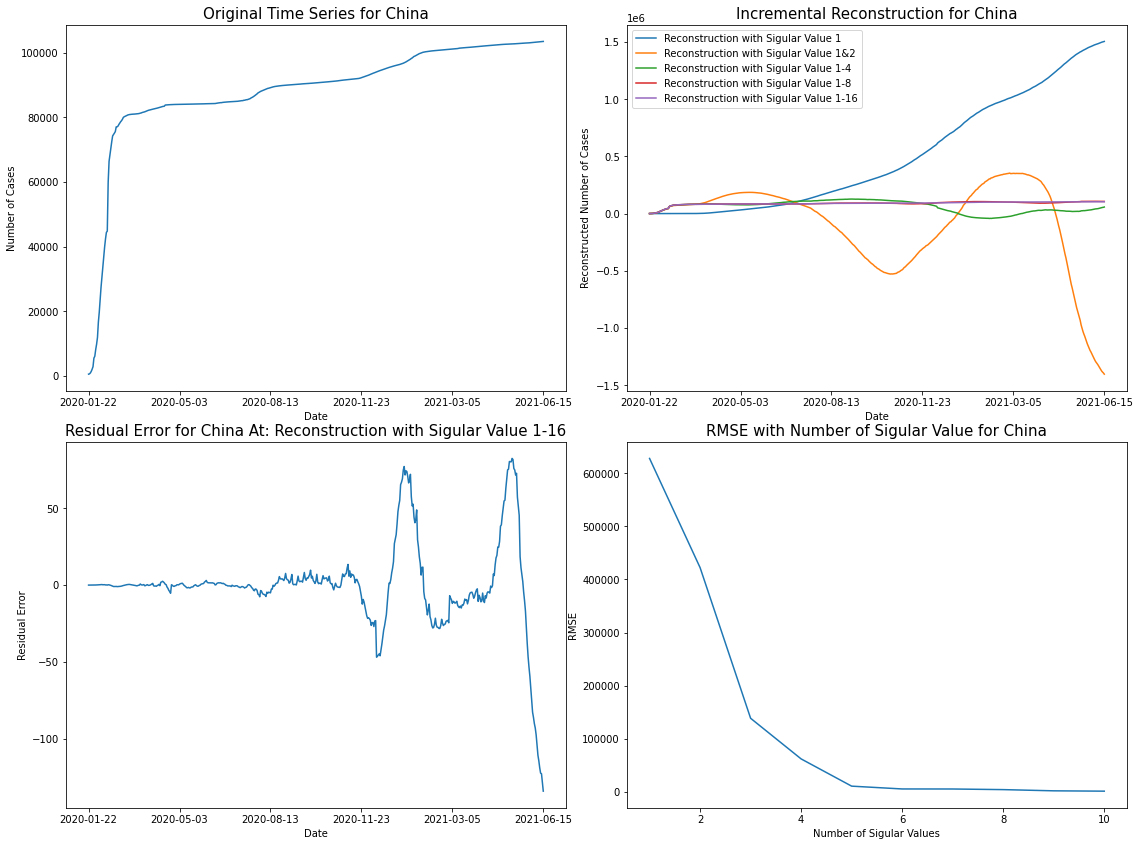

In [214]:
plot_country_figures_SVD(cases_raw,'China')

In this part, standardization is performed to avoid the effects caused by different scaling in different features.  

But covariance computation is not required. Because in SVD, we can perform reconstruction by selecting the number of singular values and multiplying with the corresponding columns and row in the left-singular vector and the right-singular vector. Hence, we do not need to compute the covariance matrix and extract eigenvectors from it.  

After standardized the data, there is no big difference between PCA and SVD results.  

# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




### Create new dataset

In [215]:
url="https://datahub.io/core/covid-19/r/countries-aggregated.csv"
c=pd.read_csv(url)
# Code From: https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

In [216]:
c = pd.DataFrame(c)
c = c[['Date','Country','Confirmed']]
c['Date'] = pd.to_datetime(c['Date']) 
mask = (c['Date'] > '2021-06-15')
c = c.loc[mask]
# Code From: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

In [217]:
c['Date'] = c['Date'].dt.strftime('%Y-%m-%d')
date = c['Date'].unique()
# Code From: https://www.codegrepper.com/code-examples/python/convert+datetime+to+string+pandas

In [218]:
new = pd.DataFrame(index=c['Country'].unique().tolist(),columns=date)

In [219]:
country = c['Country'].unique().tolist()

In [220]:
for i in country:
  for d in date:
    a = c.loc[(c['Country']==i)&(c['Date']==d)]
    new[d][i] = int(a['Confirmed'].values)

In [221]:
cases_new = cases_raw.join(new)

In [222]:
# load train.csv to Google Colab
from google.colab import files
cases_new.to_csv('cases.csv')
files.download('cases.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Upload csv

In [223]:
uploaded = files.upload()

Saving cases-new.csv to cases-new (3).csv


In [224]:
cases = pd.read_csv('cases-new.csv',index_col=0)

In [229]:
cases

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,728435,736972,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,392452,394683,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8830,8861,8891,8934,8988,9016,9039,9067,9111,

### Repeat Part(4)

Need to modify the ticks for x-axis as new dataframe has more dates, so new function *plot_country_figures_SVD1* created below. 

In [225]:
def plot_country_figures_SVD1 (original_df, country_name):
  scaler = StandardScaler()
  df_std = scaler.fit_transform(original_df)
  df_std = pd.DataFrame(df_std,columns=original_df.columns.values,index=original_df.index.values)

  U, S, V = np.linalg.svd(df_std)

  time = original_df.columns.tolist()
  ticks = ['2020-01-22','2020-05-09','2020-08-25','2020-12-11',
         '2021-03-29','2021-07-15','2021-11-01']

  u = U[:,0:1]
  v = V[0:1,:]
  A = pd.DataFrame(scaler.inverse_transform(S[0:1]*u@v),
                   columns=original_df.columns.values,index=original_df.index.values)

  u1 = U[:,0:2]
  v1 = V[0:2,:]
  A1 = pd.DataFrame(scaler.inverse_transform(S[0:2]*u1@v1),
                    columns=original_df.columns.values,index=original_df.index.values)

  u2 = U[:,0:4]
  v2 = V[0:4,:]
  A2 = pd.DataFrame(scaler.inverse_transform(S[0:4]*u2@v2),
                    columns=original_df.columns.values,index=original_df.index.values)

  u3 = U[:,0:8]
  v3 = V[0:8,:]
  A3 = pd.DataFrame(scaler.inverse_transform(S[0:8]*u3@v3),
                    columns=original_df.columns.values,index=original_df.index.values)

  u4 = U[:,0:16]
  v4 = V[0:16,:]
  A4 = pd.DataFrame(scaler.inverse_transform(S[0:16]*u4@v4),
                    columns=original_df.columns.values,index=original_df.index.values)

  fig, axs =  plt.subplots(2,2,figsize=(16,12))
  fig.tight_layout(pad=3.0)
  
  # Plot 1
  axs[0,0].plot(time,original_df.loc[country_name].values)
  axs[0,0].set_title('Original Time Series for ' + str(country_name), size=15)
  axs[0,0].set_xlabel('Date')
  axs[0,0].set_ylabel('Number of Cases')
  axs[0,0].set_xticks(ticks)

  # Plot 2
  axs[0,1].plot(time,A.loc[country_name].values,label='Reconstruction with Sigular Value 1')
  axs[0,1].plot(time,A1.loc[country_name].values,label='Reconstruction with Sigular Value 1&2')
  axs[0,1].plot(time,A2.loc[country_name].values,label='Reconstruction with Sigular Value 1-4')
  axs[0,1].plot(time,A3.loc[country_name].values,label='Reconstruction with Sigular Value 1-8')
  axs[0,1].plot(time,A4.loc[country_name].values,label='Reconstruction with Sigular Value 1-16')
  axs[0,1].legend()
  axs[0,1].set_title('Incremental Reconstruction for ' + str(country_name),size=15)
  axs[0,1].set_xlabel('Date')
  axs[0,1].set_ylabel('Reconstructed Number of Cases')
  axs[0,1].set_xticks(ticks)

  # Plot 3
  Label = ['Reconstruction with Sigular Value 1','Sigular Value 1&2',
           'Reconstruction with Sigular Value 1-4','Reconstruction with Sigular Value 1-8',
           'Reconstruction with Sigular Value 1-16']
  residual_error = [original_df.loc[country_name].values-A.loc[country_name].values,
                    original_df.loc[country_name].values-A1.loc[country_name].values,
                    original_df.loc[country_name].values-A2.loc[country_name].values,
                    original_df.loc[country_name].values-A3.loc[country_name].values,
                    original_df.loc[country_name].values-A4.loc[country_name].values]
  sum_sqerror = [sum((original_df.loc[country_name].values-A.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-A1.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-A2.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-A3.loc[country_name].values)**2),
                 sum((original_df.loc[country_name].values-A4.loc[country_name].values)**2)]
  axs[1,0].plot(time,residual_error[np.array(sum_sqerror).argmin()])
  axs[1,0].set_title('Residual Error for ' + str(country_name) 
  + ' At: ' + str(Label[np.array(sum_sqerror).argmin()]),size=15)
  axs[1,0].set_xlabel('Date')
  axs[1,0].set_ylabel('Residual Error')
  axs[1,0].set_xticks(ticks)

  # Plot 4
  RMSE = []
  for i in range(1,11):
    u = U[:,0:i]
    v = V[0:i,:]
    A = pd.DataFrame(scaler.inverse_transform(S[0:i]*u@v),index=original_df.index.values)
    n = A.loc[country_name].size
    SE = sum((original_df.loc[country_name].values-A.loc[country_name].values)**2)/n
    RMSE.append(math.sqrt(SE))
  x = list(range(1,11))
  axs[1,1].plot(x,RMSE)
  axs[1,1].set_title('RMSE with Number of Sigular Value for ' + str(country_name),size=15)
  axs[1,1].set_xlabel('Number of Sigular Values')
  axs[1,1].set_ylabel('RMSE')

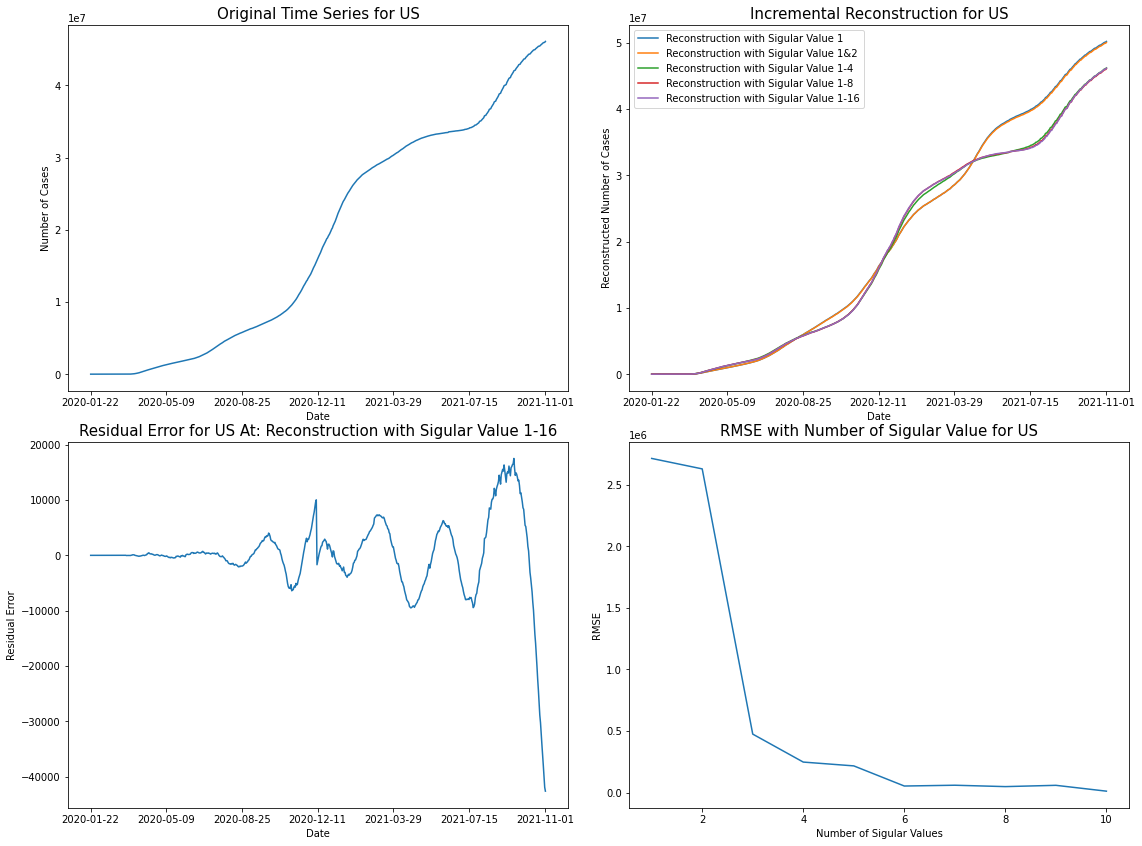

In [226]:
plot_country_figures_SVD1(cases,'US')

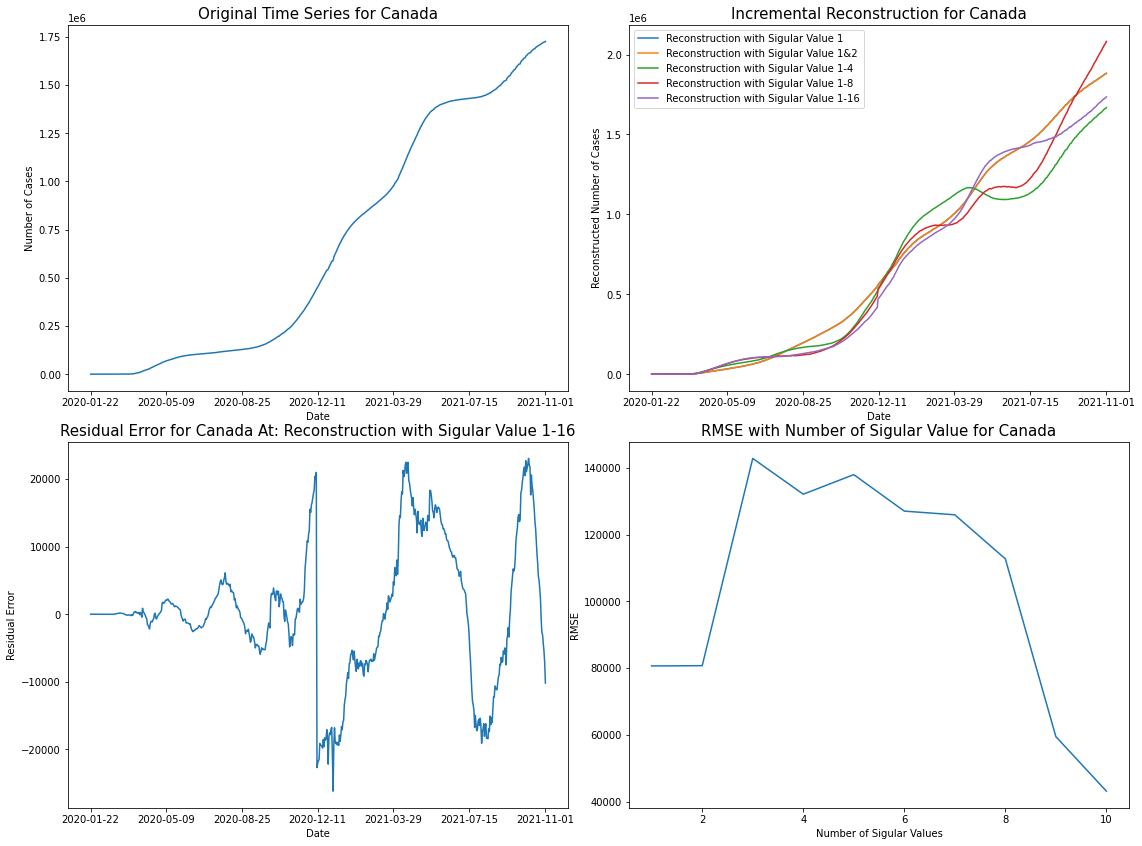

In [227]:
plot_country_figures_SVD1(cases,'Canada')

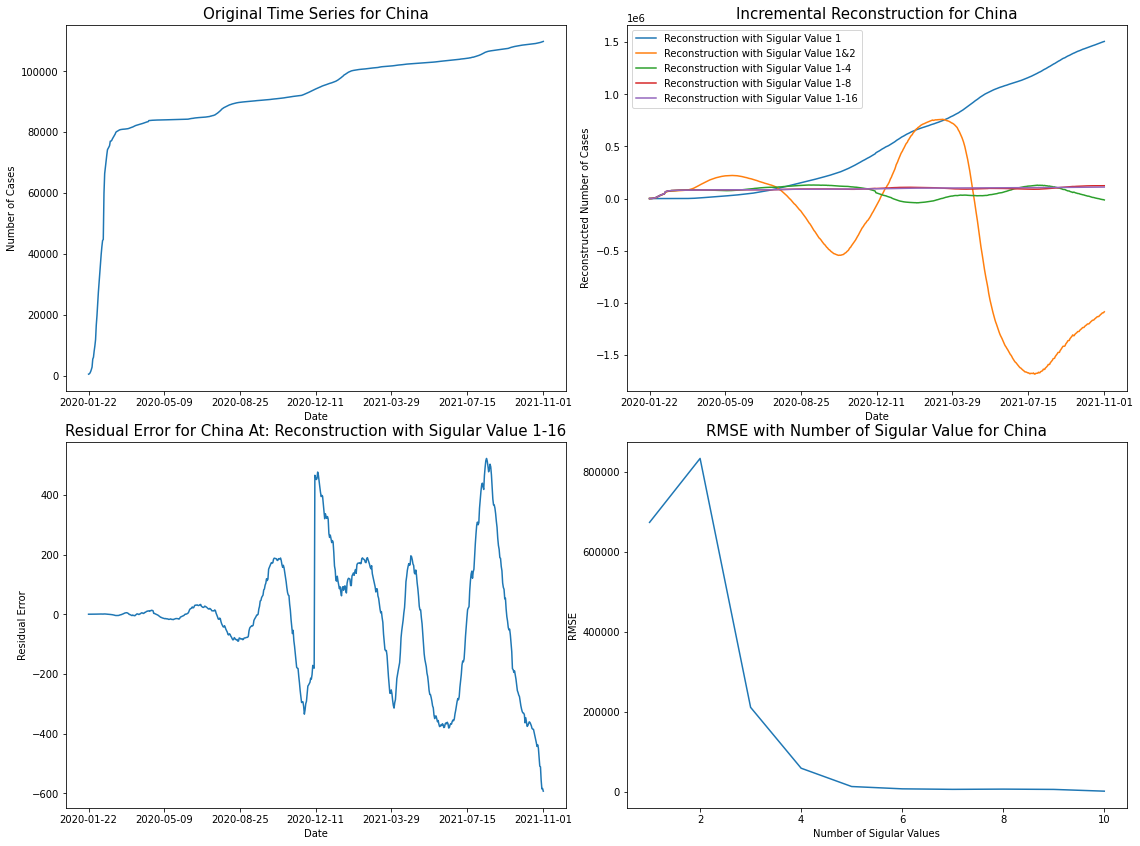

In [228]:
plot_country_figures_SVD1(cases,'China')

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

